<a href="https://colab.research.google.com/github/WilkisterMbaka/Hypothyroid-Patients-Prediction/blob/main/_8Moringa_Data_Science_Prep_W8_Independent_Project_2022_06_Wilkister_Mbaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothyroid Patients Prediction**

## **1.0 Defining The Question**

**a) Specifying the Question**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**b) Defining the Metric for Success**

* Exploratory Data Analysis
* Building regression models
    * Random forests, Ada boosted trees, or gradient boosted trees
    * SVM

**c) Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

**d) Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
5. Performing modelling.

## **2.0 Reading Data**

In [ ]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('http://bit.ly/hypothyroid_data')

## **3.0 Checking the Data**

In [ ]:
# Check top 5 records
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Check bottom 5 records
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 3163 
Number of columns: 26


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
#Checking how many unique value are in a column
df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [ ]:
# Check for unique values in each column
for col in df.columns:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

status column unique values: 

['hypothyroid' 'negative']
**********


age column unique values: 

['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
**********


sex column unique values: 

['M' 'F' '?']
**********


on_thyroxine column unique values: 

['f' 't']
**********


query_on_thyroxine column unique values: 

['f' 't']
**********


on_antithyroid_medication column unique values: 

['f' 't']
**********


thyroid_surgery column unique values: 

['f' 't']
**********


query_hypothyroid column unique values: 

['f' 't']
**********


query_hyperthyroid column unique values: 

**Observations**
1. Sex column has missing values
2. TBG, FT1, T4U, TT4, T3, TSH, Age columns are saved as object but are numerical and have missing values marked with ?

## **4.0 Tidying the Dataset**

In [ ]:
# Replace columns with ? with nan values
df = df.replace(r'?', np.NaN)

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# Drop TBG because it has too many null values
df.drop('TBG', axis=1, inplace=True)

In [ ]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
53,hypothyroid,69,F,f,f,f,f,f,f,f,...,21,y,0.80,y,53,y,0.86,y,61,n
66,hypothyroid,62,M,f,f,f,f,f,f,f,...,100,y,0.40,y,10,y,1,y,10,n
124,hypothyroid,77,F,f,f,f,f,f,f,f,...,23,y,0.50,y,33,y,0.67,y,49,n
128,hypothyroid,79,F,f,f,f,f,f,f,f,...,29,y,1.60,y,47,y,0.97,y,48,n
131,hypothyroid,50,F,t,f,f,f,f,f,f,...,34,n,NaN,y,55,y,0.93,y,60,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,negative,74,F,t,f,f,f,f,f,f,...,21,y,1.80,y,126,y,1.18,y,107,n
3071,negative,NaN,F,f,f,f,f,f,f,f,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y
3111,negative,89,M,f,f,f,f,f,f,f,...,1.30,y,0.90,y,82,y,0.80,y,103,n
3124,negative,40,F,f,f,f,f,f,t,f,...,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y


In [ ]:
# Drop duplicates in ranking dataset
df.drop_duplicates(inplace=True)

# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Change columns from object to float
df['age'] = df['age'].astype(float)
df['FTI'] = df['FTI'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TSH'] = df['TSH'].astype(float)


In [ ]:
# Fill NaN Values in All Columns with Median because it is not affected by outliers

df = df.fillna(df.median())

# Check for missing values in the dataset
df.isnull().sum()

status                        0
age                           0
sex                          73
on_thyroxine                  0
query_on_thyroxine            0
on_antithyroid_medication     0
thyroid_surgery               0
query_hypothyroid             0
query_hyperthyroid            0
pregnant                      0
sick                          0
tumor                         0
lithium                       0
goitre                        0
TSH_measured                  0
TSH                           0
T3_measured                   0
T3                            0
TT4_measured                  0
TT4                           0
T4U_measured                  0
T4U                           0
FTI_measured                  0
FTI                           0
TBG_measured                  0
dtype: int64

In [ ]:
#Drop missing values
df = df.dropna()

# Check for missing values in the dataset
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

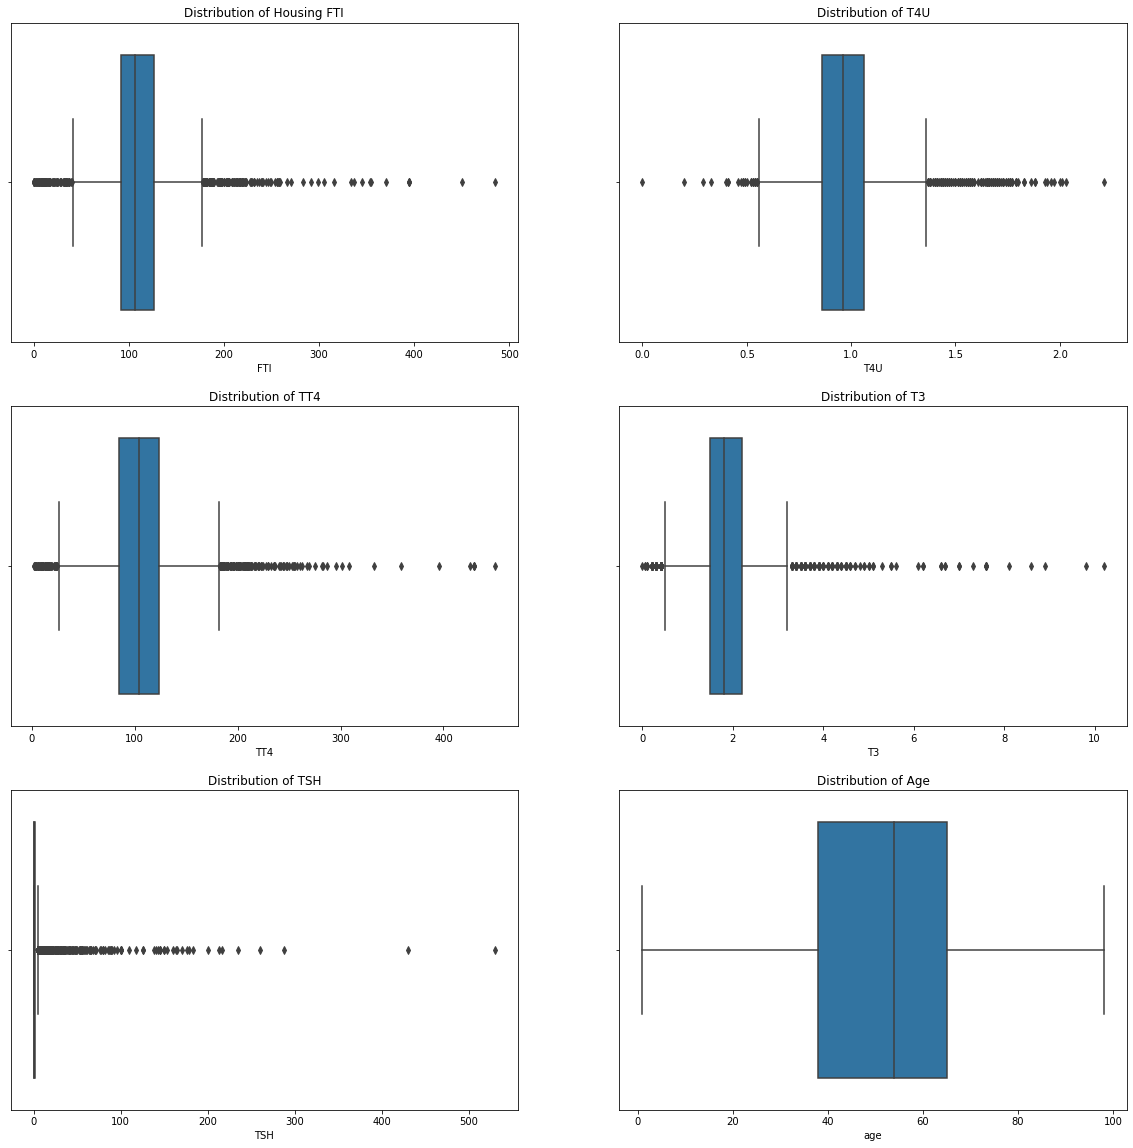

In [ ]:
# Check for outliers
fig, ax= plt.subplots(3,2,figsize=[20, 20])
# TBG, FTI, T4U, TT4, T3, TSH, age

sns.boxplot(data=df, x='FTI', ax=ax[0,0]).set_title('Distribution of Housing FTI')
sns.boxplot(data=df, x='T4U', ax=ax[0,1]).set_title('Distribution of T4U')
sns.boxplot(data=df, x='TT4', ax=ax[1,0]).set_title('Distribution of TT4')
sns.boxplot(data=df, x='T3', ax=ax[1,1]).set_title('Distribution of T3')
sns.boxplot(data=df, x='TSH', ax=ax[2,0]).set_title('Distribution of TSH')
sns.boxplot(data=df, x='age', ax=ax[2,1]).set_title('Distribution of Age')
plt.show()

In [ ]:
#There seems to be very many outliers but lets count them to be sure

# df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
#        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#        'sqft_living15', 'sqft_lot15']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/df.shape[0] * 100

FTI                           8.645337
FTI_measured                  0.000000
T3                            7.828455
T3_measured                   0.000000
T4U                           6.466984
T4U_measured                  0.000000
TBG_measured                  0.000000
TSH                          13.274336
TSH_measured                  0.000000
TT4                           7.692308
TT4_measured                  0.000000
age                           0.000000
goitre                        0.000000
lithium                       0.000000
on_antithyroid_medication     0.000000
on_thyroxine                  0.000000
pregnant                      0.000000
query_hyperthyroid            0.000000
query_hypothyroid             0.000000
query_on_thyroxine            0.000000
sex                           0.000000
sick                          0.000000
status                        0.000000
thyroid_surgery               0.000000
tumor                         0.000000
dtype: float64

## **5.0 Exploratory Data Analysis**

### **5.1 Univariate Analysis**

In [ ]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

**Numerical Attributes**

In [ ]:
# Getting the univariate describe summary

num_attributes.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,51.755956,5.180613,1.899694,108.037066,0.983376,111.471035
std,18.056036,22.772388,0.864438,43.014313,0.212084,41.304331
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,65.000000,1.800000,2.200000,124.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,485.000000


In [ ]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,age,325.909469,97.00,18.052963,-0.257851,-0.645928
1,TSH,518.405139,530.00,22.768512,10.899027,171.908618
2,T3,0.747000,10.20,0.864291,2.457592,14.534695
3,TT4,1849.601393,448.00,43.006992,1.550631,7.864047
4,T4U,0.044965,2.21,0.212048,1.314222,3.965749
5,FTI,1705.467088,485.00,41.297301,1.593318,9.379641


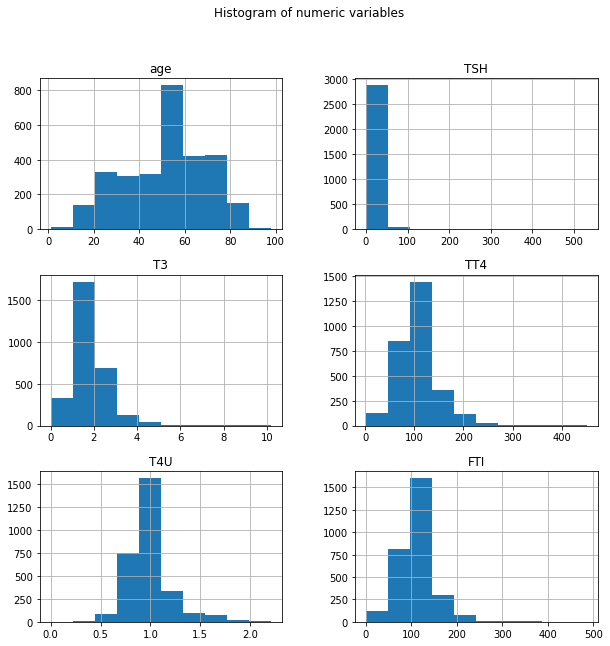

In [ ]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

**Categorical Attributes**

In [ ]:
cat_attributes.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured',
       'FTI_measured', 'TBG_measured'],
      dtype='object')

In [ ]:
cat_attributes['status'].dtype

dtype('O')

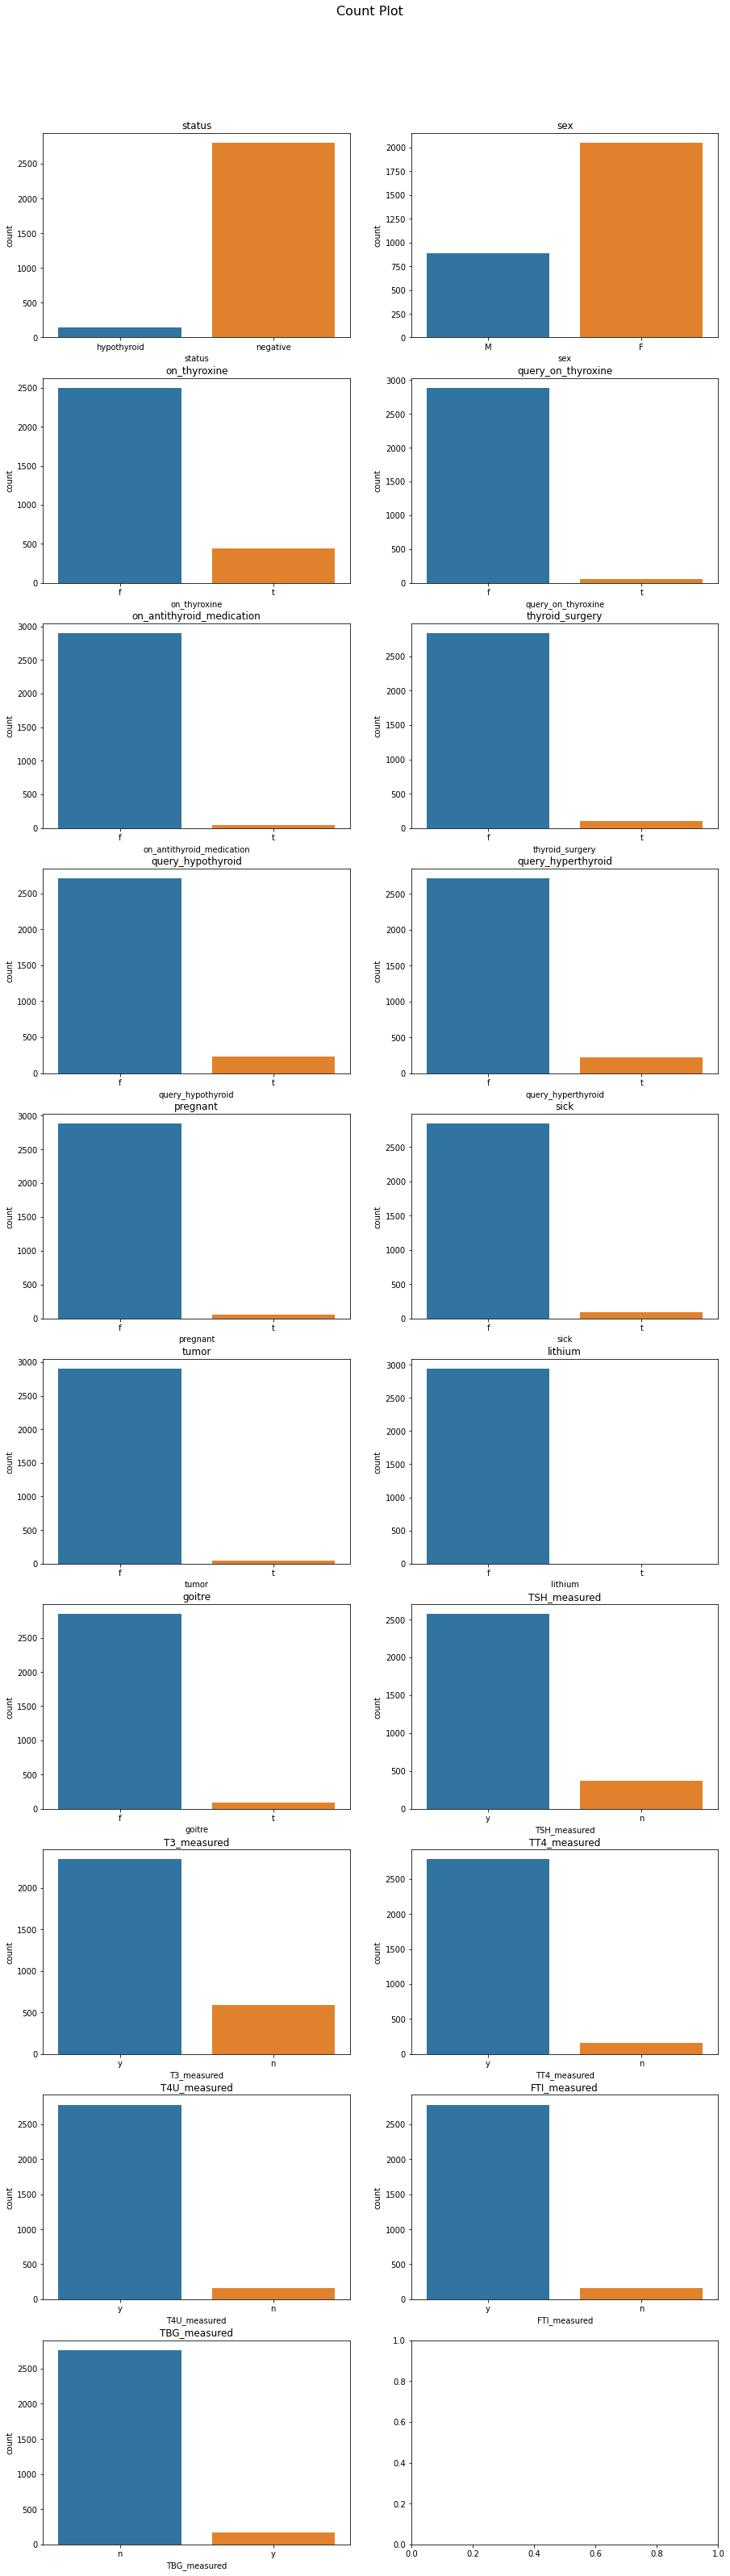

In [ ]:
## for multiple columns
# fig, ax = plt.subplots(2, 10, figsize=(20, 50))
fig, axis = plt.subplots(10, 2, figsize=[15,55])
fig.suptitle('Count Plot', fontsize=16, y=0.92)

# ax = axis.flatten()[i]

for i, col in enumerate(cat_attributes.columns):
    # graph = sns.countplot(y=cat_attributes[col], ax=ax[i])
    graph = sns.countplot(x=cat_attributes[col], ax=axis.flatten()[i])
    axis.flatten()[i].set_title(*[col])
    # ax[i].set_title(*[col])
    # graph.bar_label(graph.containers[0])

**Observations**
1. Majority of our data do not have hypothiroid
2. Majority of our data is female
3. On_thyroxine majority of our data is false
4. query_on_thyroxine  majority of our data is False
5. on_antithyroid_medication majority of our data is false
6. thyroid_surgery majority of our data is false
7. query_hypothyroid majority of our data is false
8. query_hyperthyroid majority of our data is false
9. pregnant majority of our data is false
10. sick majority of our data is false
11. tumor majority of our data is false
12. lithium of our data is false
13. goitre majority of our data is false
14. TSH_measured majority of our data is yes
15. T3_measure majority of our data is yes
16. TT4_measured majority of our data is yes
17. TU4_measure majority of our data is yes
18. FTI_measured majority of our data is yes
19. TBG_measured majority of our data is no


### **5.2 Bivariate Analysis**

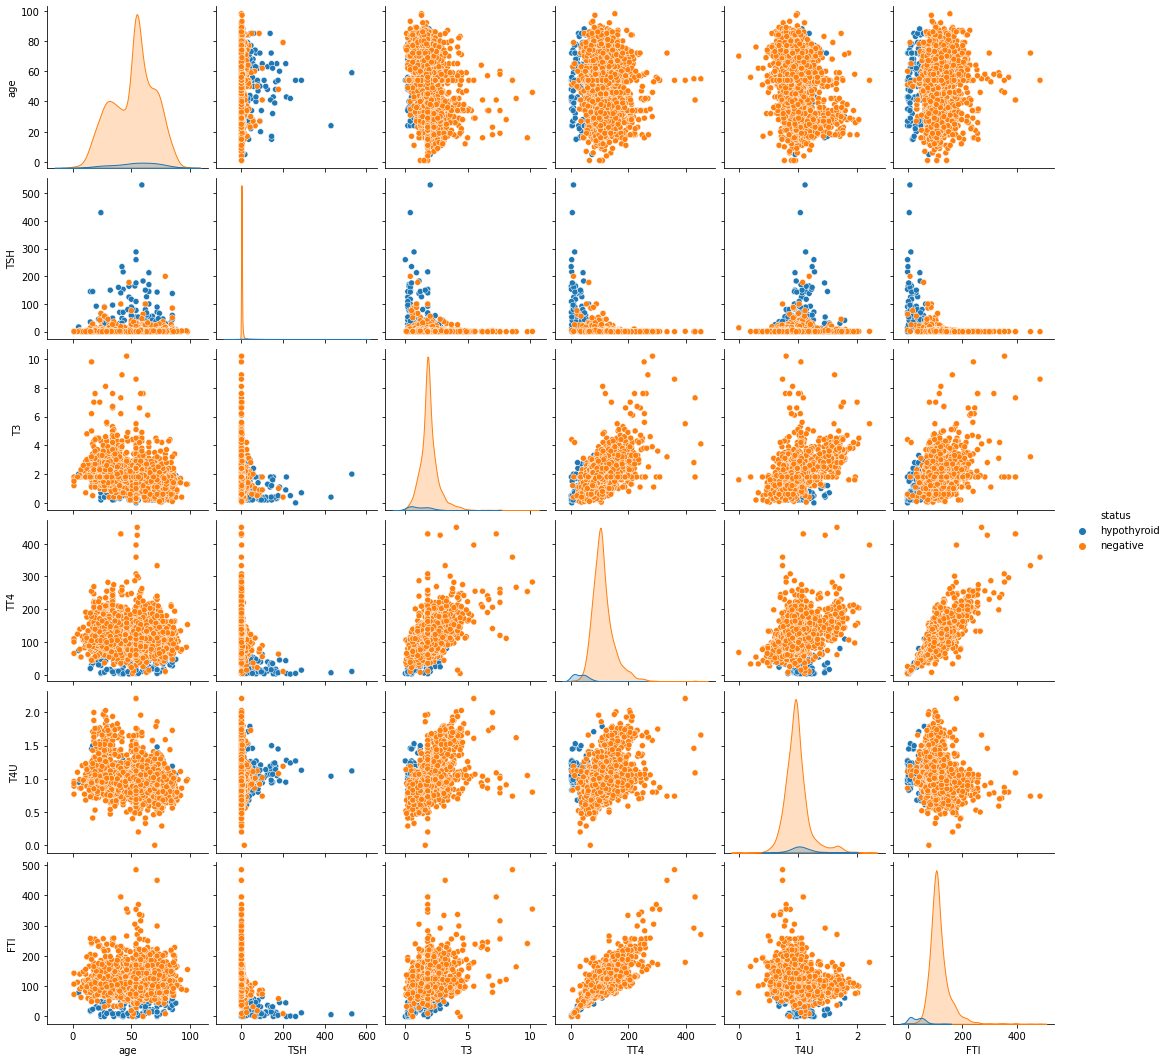

In [ ]:
# Pair plot analysis for the whole dataframe
sns.pairplot(df, diag_kind='kde', hue='status')
plt.show()

Text(0.5, 1.0, 'Correlation between All Features')

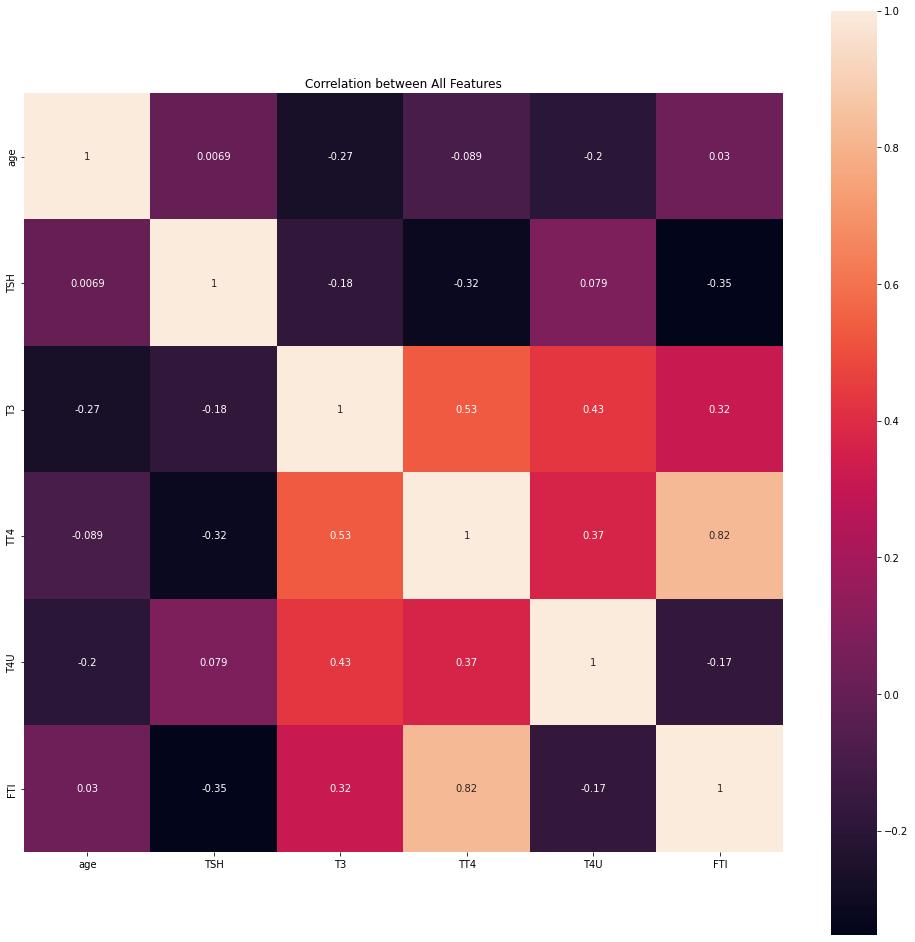

In [ ]:
# Check correlation of all columns
plt.figure(figsize=(17,17))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

1. FTI and TT4 have a high positive correlation of 0.82

2. T3 and TT4 have a positive correlation of 0.53

3. T3 and T4u have a positive correlation of 0.43

## **6.0 Random Forest**

In [ ]:
# Create a copy of the original dataset
df_copy = df.copy()

In [ ]:
# Convert categorical variables to numeriv variables
df_copy = df.copy()
df['status'] = np.where(df['status']=='hypothyroid',1,0)
df['sex'] = np.where(df['sex']=='F',1,0)
df['on_thyroxine'] = np.where(df['on_thyroxine']=='t',1,0)
df['query_on_thyroxine'] = np.where(df['query_on_thyroxine']=='t',1,0)
df['on_antithyroid_medication'] = np.where(df['on_antithyroid_medication']=='t',1,0)
df['thyroid_surgery'] = np.where(df['thyroid_surgery']=='t',1,0)
df['query_hypothyroid'] = np.where(df['query_hypothyroid']=='t',1,0)
df['query_hyperthyroid'] = np.where(df['query_hyperthyroid']=='t',1,0)
df['pregnant'] = np.where(df['pregnant']=='t',1,0)
df['sick'] = np.where(df['sick']=='t',1,0)
df['tumor'] = np.where(df['tumor']=='t',1,0)
df['lithium'] = np.where(df['lithium']=='t',1,0)
df['goitre'] = np.where(df['goitre']=='t',1,0)
df['TSH_measured'] = np.where(df['TSH_measured']=='y',1,0)
df['T3_measured'] = np.where(df['T3_measured']=='y',1,0)
df['TT4_measured'] = np.where(df['TT4_measured']=='y',1,0)
df['T4U_measured'] = np.where(df['T4U_measured']=='y',1,0)
df['FTI_measured'] = np.where(df['FTI_measured']=='y',1,0)
df['TBG_measured'] = np.where(df['TBG_measured']=='y',1,0)

df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,0,0,0,0,0,0,0,...,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,...,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = df['status'].values

test_features = df.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5) 

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


In [ ]:
# Now that we have trained our model, let's test how well it can predict the breast cancer of a patient
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
print(model_accuracy)

# # We've gotten a classification rate of 95.61%. This is a pretty good accuracy score 

# # For further evaluation you can also check the confusion matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

0.9886621315192744
[[845   1]
 [  9  27]]


Accuracy score for random forest is 98.87%

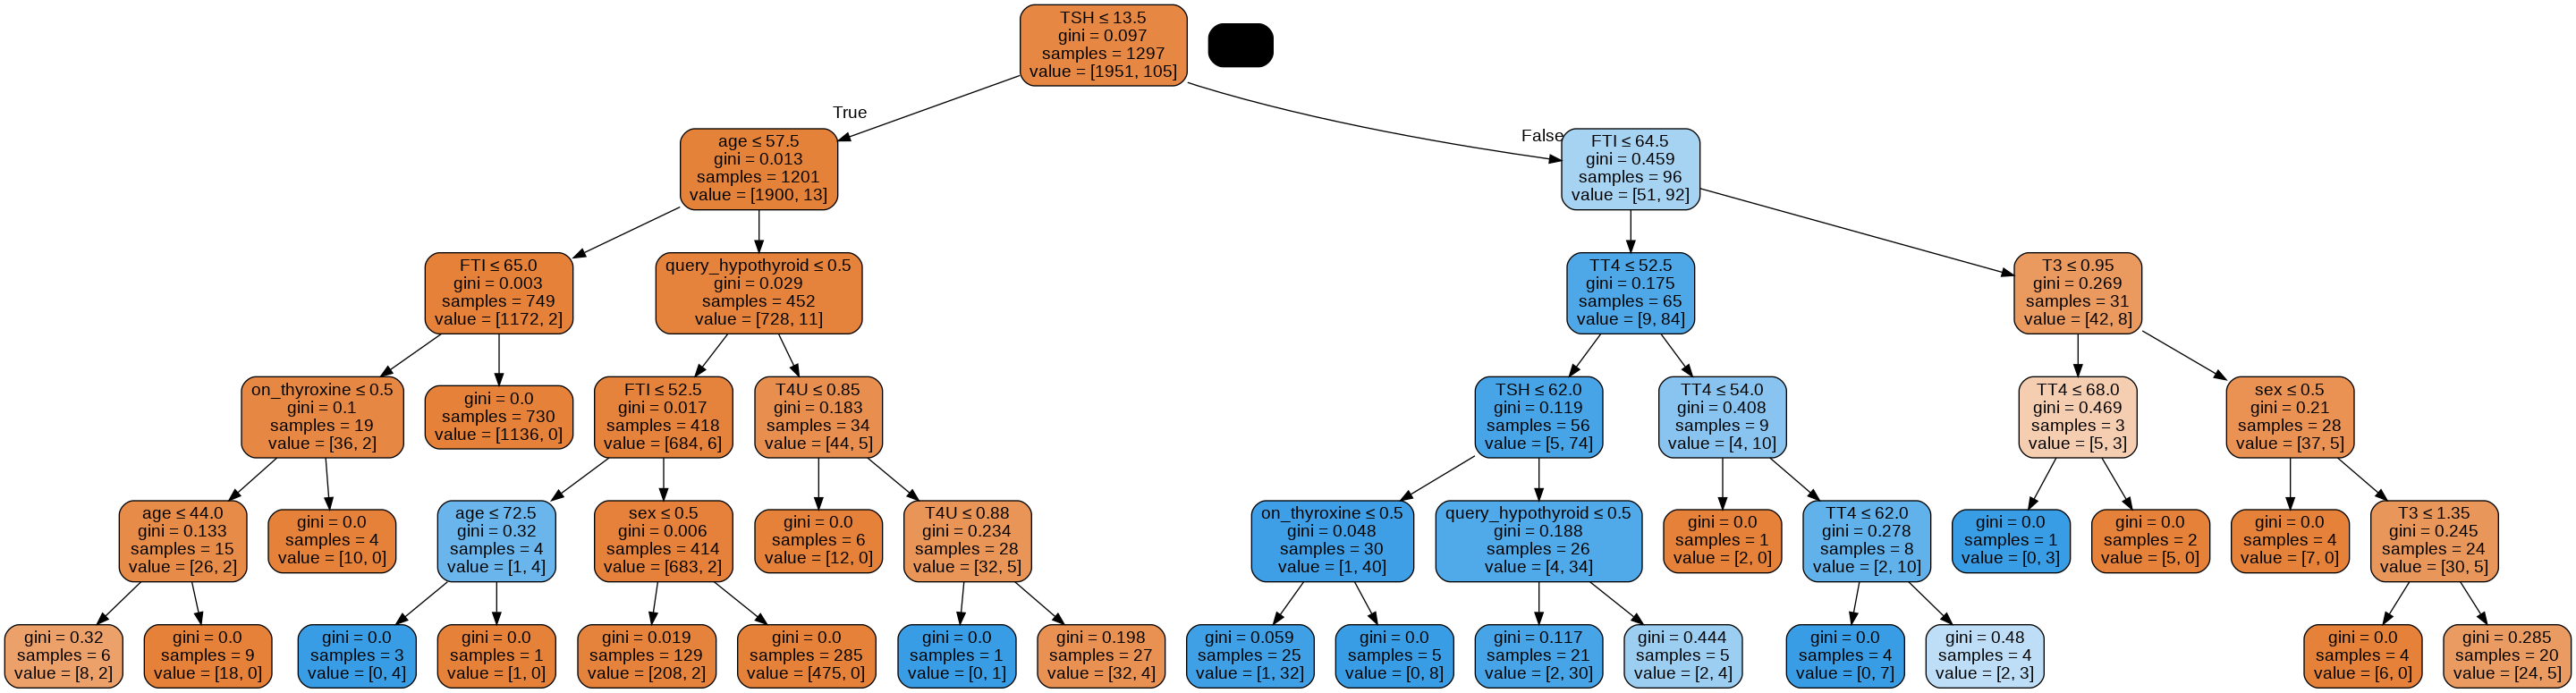

In [ ]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [ ]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.01), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.65), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.05), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.26), ('TBG_measured', 0.0)]

Variable: TSH                  Importance: 0.65
Variable: FTI                  Importance: 0.26
Variable: TT4                  Importance: 0.05
Variable: age                  Importance: 0.01
Variable: query_hypothyroid    Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid

Our important features are TSH, FTI and TT4

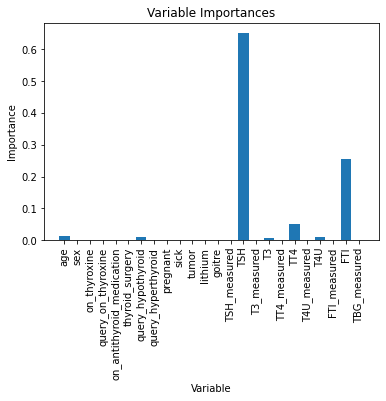

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## **7.0 Ada Boosted Trees**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth=4),
                          n_estimators=300)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

In [ ]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred_ada)
print(model_accuracy)

# # We've gotten a classification rate of 95.61%. This is a pretty good accuracy score 

# # For further evaluation you can also check the confusion matrix
cfm = confusion_matrix(y_test, y_pred_ada)
print(cfm)

0.9920634920634921
[[844   2]
 [  5  31]]


Accuracy score for ada boosted trees is 99.21% which is good

## **8.0 Support Vector Machine**

**Modelling with the 2 most important features from the random forest**

### **8.1 Linear Kernel**

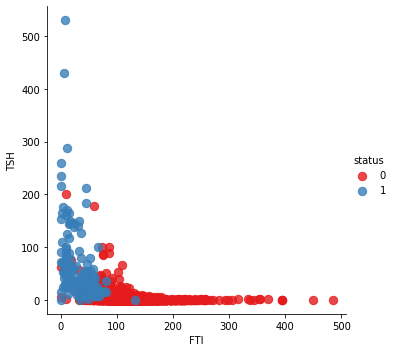

In [ ]:
# Plotting our desired features
sns.lmplot('FTI','TSH', data=df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

In [ ]:
import seaborn as sns; sns.set(font_scale=1.2)
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC

# Seperating the target from our data
X = df[['FTI','TSH']] # We remove X4 column since its our target column and unnamed because its not relevant in diagnosis. 
y = df['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Let's now build the svm model 
thyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
thyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred_svc_lin = thyroid_model.predict(X_test)

# Now that we have trained our model, let's test how well it can predict the breast cancer of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred_svc_lin)
print(model_accuracy)

# # We've gotten a classification rate of 95.61%. This is a pretty good accuracy score 

# # For further evaluation you can also check the confusion matrix
cfm = confusion_matrix(y_test, y_pred_svc_lin)
print(cfm)

0.9829931972789115
[[559   2]
 [  8  19]]


The accuracy score for the linear kernel is 98.30%

### **8.2 Polynomial Kernel**

In [ ]:
# Seperating the target from our data
X = df[['FTI','TSH']] # We remove X4 column since its our target column and unnamed because its not relevant in diagnosis. 
y = df['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

# making prediction
y_pred_svc_poly = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_svc_poly))
print(confusion_matrix(y_test, y_pred_svc_poly))

0.9863945578231292
[[558   3]
 [  5  22]]


The accuracy score for the polynomial kernel is 98.63%

### **8.3 Radial basis function (rbf)**

In [ ]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_svc_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_svc_rbf))
print(confusion_matrix(y_test, y_pred_svc_rbf))

0.9897959183673469
[[561   0]
 [  6  21]]


The accuracy score for the rbf kernel is 98.97%

**Chose SVM rbf kernel for modelling of all features because it has higher accuracy**

In [ ]:
# Seperating the target from our data
X = df.drop('status', axis=1) # We remove status column since its our target column 
y = df['status']

# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_svc_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred_svc_rbf))
print(confusion_matrix(y_test, y_pred_svc_rbf))

0.9846938775510204
[[559   2]
 [  7  20]]


The accuracy score of the rbf model using all features id 98.46%

## **9.0 Conclusion**

All the models performed well with a range of 98% - 99%

In decision trees, ada boosted performed better than random forest.

In SVM, the rbf kernel performed better than the linear and polynomial kernels but with a difference of decimals.